In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import pandas as pd
import seaborn as sns

from gMLV import *
#import importlib
# import gMLV_ML
# import gMLV_sim
#importlib.reload(gMLV_ML);
#importlib.reload(gMLV_sim);

In [2]:
# some plotting functions
def plot_fit_gLV(yobs, y0, nsp, m_h, M_h):
    # plot the fit
    cols = ["red", "green", "blue", "royalblue","black"]
    #cols = [1,2,3,4,5]
    yobs_pred = odeint(gLV, y0, times, args=(nsp, mu_h, M_h))
    for i in range(nsp):
        plt.plot(times, yobs[:, i], color=cols[i])
        plt.plot(times, yobs_pred[:, i], '--', color=cols[i])

def plot_params(mu_h, M_h, e_h ):
    print("\ninferred params:")
    print("mu_hat/mu:")
    print(np.array(mu_h))
    print("\nM_hat/M:")
    print(np.round(np.array(M_h),decimals=2))
    print("e_hat/e:")
    print(np.array(e_h))

    # plot the params
    plt.figure(figsize=(6.4*3,4.8))
    plt.subplot(1, 3, 1)
    plt.stem(np.arange(0,nsp, dtype="int32"), np.array(mu_h), markerfmt="D")

    plt.subplot(1, 3, 2)
    plt.stem(np.arange(0,nsp*nsp), np.array(M_h).flatten(), markerfmt="D")
    
    plt.subplot(1, 3, 3)
    plt.stem(np.arange(0,nsp), np.array(e_h), markerfmt="D")
    

## Repeat Stein et al. 2013 analysis


minimum found: a0/a1/a2/error: 4.6415888336127775 0.00046415888336127773 4.641588833612782e-06 1.4663946574005609
unconstrained error        : 1.6595269019482057

inferred params:
mu_hat/mu:
[0.37098316 0.90088961 0.462955   0.59916519 0.38675838 0.29465484
 0.49303214 0.43281534 0.97560589 0.33326782 0.65852856]

M_hat/M:
[[-0.39  0.07 -0.32  0.04  0.21 -0.21  0.29  0.13 -0.33 -0.03 -0.15]
 [ 0.06 -0.7  -0.18  0.01 -0.1  -0.52  0.14 -0.04  0.41  0.12 -0.07]
 [-0.29 -0.15 -0.16  0.02  0.04 -0.47  0.32  0.06 -0.34 -0.   -0.15]
 [-0.29  0.2  -0.09 -0.37 -0.06 -0.19  0.18 -0.04 -0.37 -0.04 -0.03]
 [-0.21 -0.19  0.04  0.03 -0.12 -0.42  0.27 -0.05 -0.35  0.   -0.14]
 [-0.09  0.26 -0.1  -0.12 -0.16 -0.95 -0.26 -0.08  1.1   0.12  0.26]
 [-0.04 -0.12 -0.04  0.03 -0.05 -0.19 -0.03 -0.04 -0.26 -0.   -0.11]
 [-0.23 -0.17  0.1   0.02 -0.18 -0.45  0.27 -0.07 -0.63 -0.02 -0.14]
 [-0.28 -0.47 -0.07  0.17 -0.03 -0.56  0.43  0.02 -3.48 -0.19 -0.47]
 [-0.01 -0.29 -0.04  0.03 -0.01  0.    0.11  0.01 -1.6

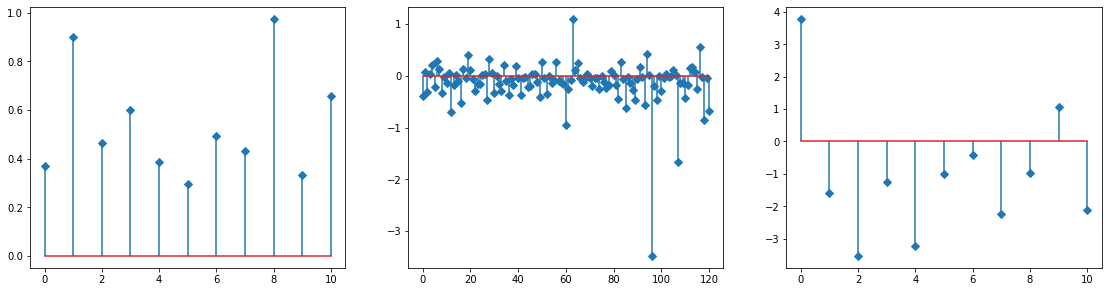

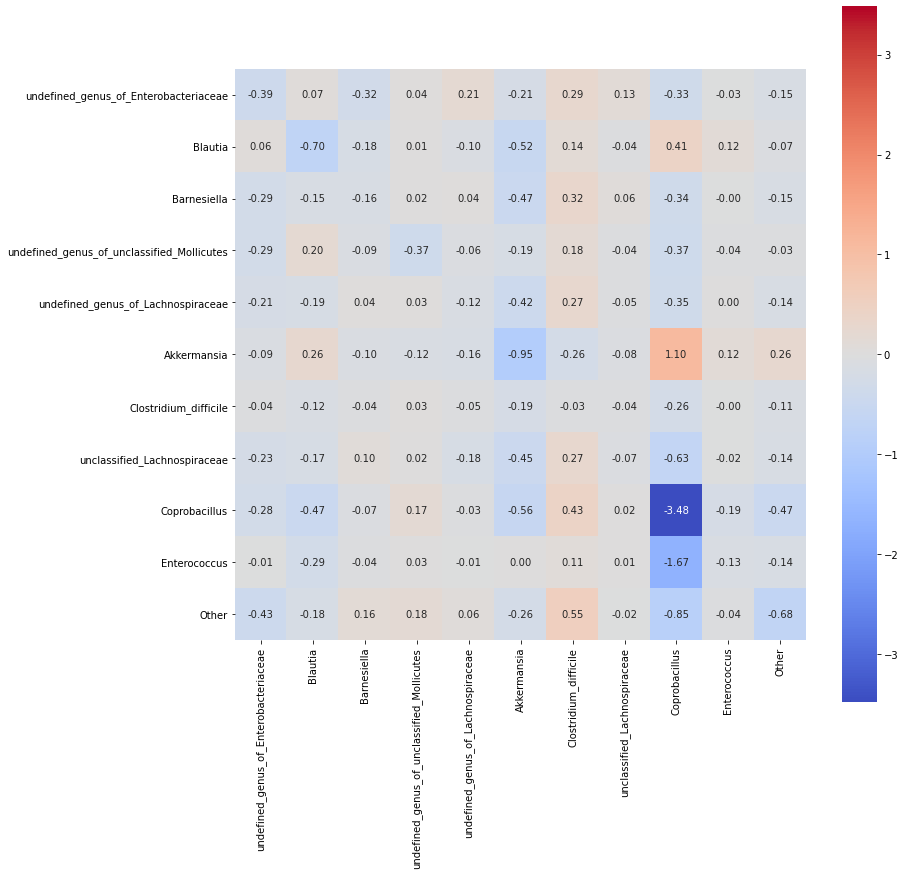

In [5]:
nsp = 11
# read in 
F = pd.read_csv('data/Stein_example_F.csv', delimiter = ',')
X = pd.read_csv('data/Stein_example_Y.csv', delimiter = ',')

#print(F)
#print(X)

F = F.drop(F.columns[[0, 1]], axis=1) 
X = X.drop(X.columns[[0, 1]], axis=1) 

colnames = F.columns.to_list()

#print(F.shape)
#print(X.shape)

# get the best lambda/alpha values on a grid via cross validation
a0, a1, a2 = fit_alpha_Ridge2(X.to_numpy(), F.to_numpy(), nsp=nsp, n_a0=10, n_a1=10, n_a2=10)

# do final fit
mu_h, M_h, e_h = do_final_fit_Ridge2(X.to_numpy(), F.to_numpy(), nsp, a0=a0, a1=a1, a2=a2)

# this does the stem plots with orange crosses the actual parameters
plot_params(mu_h, M_h, e_h )

# plot interaction matrix
plt.figure(figsize=(6.4*2,6.4*2))
lims = np.max( [np.max(M_h), np.abs(np.min(M_h)) ] )
sns.heatmap(M_h, xticklabels=colnames, yticklabels=colnames, square=True, vmin=-lims, vmax=lims, annot=True, fmt=".2f", cmap='coolwarm');
